<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/glm_probit_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# Probit Regression




## Introduction

**Probit** regression is a statistical technique that is used for analyzing binary or dichotomous outcomes, where the dependent variable can take on only two possible values, usually coded as 0 and 1. This technique is similar to logistic regression in that it models the probability of the dependent variable being one of the two possible outcomes.

In probit regression, the relationship between predictor variables and the probability of the outcome is modeled using the cumulative distribution function (CDF) of the standard normal distribution, which is known as the probit function. The probit function maps any real-valued input to a probability between 0 and 1, and it is used to model the probability that a binary outcome will be positive (or negative) given the values of the predictor variables.

When using probit regression, the coefficients of the model represent the change in the probability of the outcome associated with a unit change in the predictor variable. These coefficients are estimated using maximum likelihood estimation, which is a statistical technique used for estimating the parameters of a probability distribution by maximizing a likelihood function.

The model assumes that the linear combination of the predictor variables plus an error term follows a standard normal distribution. Mathematically, it can be represented as:

$$ Y= \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k + u $$

with

$$ P(Y = 1 | X_1, X_2,..X_k) = \Phi(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k) $$ Where:

-   $P(Y = 1 | X)$ is the probability of the outcome being 1 given the predictor variables $X$.

-   $\Phi$ is the cumulative distribution function of the standard normal distribution.

-   $\beta_0, \beta_1, \beta_2, ..., \beta_k$ are the coefficients associated with the predictor variables $X_1, X_2, ..., X_k$ respectively.

The predicted probability that $Y=1$ given $X_1,X_2,…,X_k$ can be calculated in two steps:

1.  Compute:

    $$ z= \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k $$

2.  Look up $\Phi (z)$ by calling `pnorm()`.

$\beta_j$ is the effect on $z$ of a one unit change in regressor $X_j$ holding constant all other $k-1$ regressors.

In summary, probit regression is a useful statistical technique for modeling binary outcomes, and it is particularly useful when the relationship between the predictor variables and the probability of the outcome is non-linear. By using the probit function, analysts can model the probability of a binary outcome based on the values of the predictor variables, and estimate the impact of those variables on the probability of the outcome.

Probit regression and logistic regression are both used for modeling binary outcomes, but they differ in the way they model the relationship between the predictors and the probability of the outcome. Here are the key differences between probit and logistic regression:

1.  **Link function**:

In probit regression, the link function is the cumulative distribution function (CDF) of the standard normal distribution, also known as the probit function. This method models the linear combination of predictors as the inverse of the CDF of a standard normal distribution. On the other hand, logistic regression uses the logistic function, also known as the sigmoid function, as the link function. This method models the log-odds of the outcome being in one of the categories as a linear combination of predictors.

2.  **Interpretation of coefficients**:

In logistic regression, the coefficients represent the change in the log-odds of the outcome for a one-unit change in the predictor, assuming other predictors remain constant. This makes it straightforward to interpret the impact of each predictor variable on the outcome in terms of odds ratios or probabilities. For example, if the coefficient for a predictor is 0.5, it means that a one-unit increase in that predictor is associated with a 50% increase in the odds of the outcome.

On the other hand, in probit regression, coefficients are interpreted in terms of standard deviations of the latent variable, which is the unobservable variable underlying the binary outcome. While this interpretation might be less intuitive for some users, it still provides valuable information about the relationship between predictors and the probability of the outcome. However, converting these coefficients into easily interpretable odds ratios or probabilities is not as straightforward as in logistic regression.

Overall, while logistic regression coefficients offer more direct interpretability in terms of odds ratios or probabilities, probit regression coefficients still provide valuable insights into the relationship between predictors and the probability of the outcome, albeit with a slightly different interpretation approach. The choice between logistic and probit regression often depends on the specific needs of the analysis and the preferences of the researcher.

3.  **Ease to interpretation**:

Logistic regression coefficients are more straightforward to interpret as they indicate changes in log-odds, which can be easily converted into odds ratios or probabilities. On the other hand, probit regression coefficients are interpreted in terms of standard deviations of the latent variable, which may be less intuitive for some users.

4.  **Assumptions**:

Probit regression assumes that the errors follow a normal distribution, while logistic regression assumes that the errors follow a logistic distribution. Both models require that the relationship between the predictors and the outcome is linear on the logit or probit scale. This means that the effect of a predictor on the outcome is proportional to the logarithm of the odds ratio or the cumulative distribution function of the standard normal distribution.

5.  **Applications**:

Probit regression is commonly used in economics and social sciences, while logistic regression is widely used in various fields, including medicine, biology, social sciences, and machine learning, due to its simplicity and ease of interpretation.

In practice, both probit and logistic regression can be suitable for modeling binary outcomes, and the choice between them often depends on the specific requirements of the analysis and the preferences of the researcher.


## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314951 sha256=19974d8801800674cb3a76916dd29f5a93446ebcd4e4681089997a4900c29e7b
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install necessary Python libraries

In [ ]:
!sudo apt-get install \
libssl-dev \
libcurl4-openssl-dev \
unixodbc-dev \
libxml2-dev \
libmariadb-dev \
libfontconfig1-dev \
libharfbuzz-dev \
libfribidi-dev \
libfreetype6-dev \
libpng-dev \
libtiff5-dev \
libjpeg-dev \
libcairo2-dev \
libgmp-dev \
libmpfr-dev \
liblapack-dev \
libcairo2-dev \
libzmq3-dev \
libharfbuzz-dev \
libpng-dev \
build-essential \
libcairo2-dev \
libmpfr-dev \
cmake \
gfortran

In [ ]:
!sudo apt-get install ghostscript
!sudo add-apt-repository ppa:dns/gnu
!sudo apt-get update
!sudo apt install libgsl-dev

## Check and Install Required R Packages

In [ ]:
%%R
pkg <- c(
		 'devtools',
	   'remotes',
		 'tidyverse',
     'plyr',
		 'gt',
		 'DataExplorer',
		 'rstatix',
	  'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
		 'caret',
		 'tidymodels',
     'RColorBrewer'
      )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

## Install 'ggstatsplot'

In [ ]:
!sudo apt install cmake
!sudo apt install libcairo2-dev
!sudo apt install libgmp-dev
!sudo apt-get install libmpfr-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgmp-dev is already the newest version (2:6.2.1+dfsg-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmpfr-dev is already the newest version (4.1.0-3build3).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


In [ ]:
%%R
install.packages(c("gmp", "Rmpfr", "PMCMRplus",'hrbrthemes'), lib='drive/My Drive/R/')
install.packages("ggstatsplot", lib='drive/My Drive/R/')

## Load packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(plyr)
library(DataExplorer)
library(gt)
library(rstatix)
library(ggstatsplot)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
library(ggpmisc)
#library(metrica)
library(RColorBrewer)
library(pROC)
library(ROCR)

## Data

In this exercise we will use [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). This dataset was obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal of this dataset is to predict whether or not a patient has diabetes, using specific diagnostic measurements included in the data. Some limitations were put in place while selecting instances from a larger database. Specifically, all the patients in this dataset are female, at least 21 years old, and of Pima Indian ancestry.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/puma_diabetes.csv") |>
  glimpse()

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Preg, Gluc, BP, Skin, Insulin, BMI, DPF, Age, Outcome

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 768
Columns: 9
$ Preg    <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1,…
$ Gluc    <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, …
$ BP      <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, …
$ Skin    <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0,…
$ Insulin <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230,…
$ BMI     <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0, 37.…
$ DPF     <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,…
$ Age     <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32…
$ Ou


* Preg - Number of times pregnant	Numeric	[0, 17]

* Gluc - 	Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)	Numeric	[0, 199]

* BP - 	Diastolic Blood Pressure (mm Hg)	Numeric	[0, 122]

* Skin - Triceps skin fold thickness (mm)	Numeric	[0, 99]

* Insulin - 	2-Hour Serum insulin (µh/ml)	Numeric	[0, 846]

* BMI	- Body mass index [weight in kg/(Height in m)]	Numeric	[0, 67.1]

* DPF - 	Diabetes pedigree function	Numeric	[0.078, 2.42]

* Age - 	Age (years)	Numeric	[21, 81].

* Outcome - Binary value indicating non-diabetic /diabetic	Factor	[0,1]

Source:Chang V, Bailey J, Xu QA, Sun Z. [Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8943493/). Neural Comput Appl. 2022 Mar 24:1-17. doi: 10.1007/s00521-022-07049-z. Epub ahead of print. PMID: 35345556; PMCID: PMC8943493.



## Data Processing

In [ ]:
%%R
df  <- mf |>
  dplyr::mutate_at(vars(Outcome), funs(factor))  |>
   # normalize the all numerical features
   #dplyr::mutate_at(c("age", "family_size"),  funs((.-min(.))/max(.-min(.)))) |>
  glimpse()

Rows: 768
Columns: 9
$ Preg    <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1,…
$ Gluc    <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, …
$ BP      <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, …
$ Skin    <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0,…
$ Insulin <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230,…
$ BMI     <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0, 37.…
$ DPF     <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,…
$ Age     <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32…
$ Outcome <fct> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,…


## Data Exploration

### Plot basic data information

`plot_intro()` function of **DataExplorer** package plot basic information (from introduce) the data.

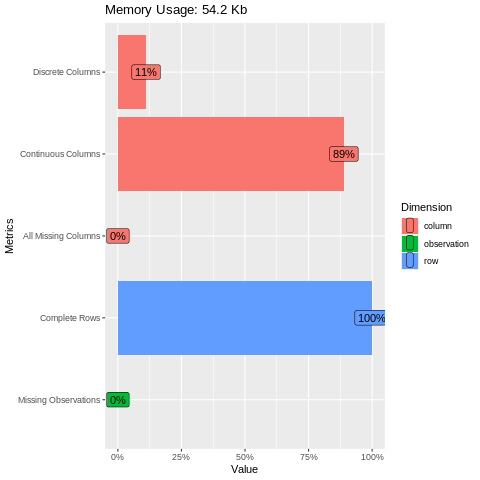

In [ ]:
%%R
df  |>
   plot_intro()

### Summary Statistics

In [ ]:
%%R
mf |>
  # select variables
  dplyr::select (Preg, Gluc, BP,
                Skin, Insulin, BMI,
                BP, Age) |>
  get_summary_stats (type = "common")

# A tibble: 7 × 10
  variable     n   min   max median   iqr   mean     sd    se    ci
  <fct>    <dbl> <dbl> <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>
1 Preg       768     0  17      3     5     3.84   3.37 0.122 0.239
2 Gluc       768     0 199    117    41.2 121.    32.0  1.15  2.26 
3 BP         768     0 122     72    18    69.1   19.4  0.698 1.37 
4 Skin       768     0  99     23    32    20.5   16.0  0.576 1.13 
5 Insulin    768     0 846     30.5 127.   79.8  115.   4.16  8.16 
6 BMI        768     0  67.1   32     9.3  32.0    7.88 0.284 0.558
7 Age        768    21  81     29    17    33.2   11.8  0.424 0.833


### Correlation

In [ ]:
%%R
cor_data<- mf |>
  # select variables
  dplyr::select (Preg, Gluc, BP,
                Skin, Insulin, BMI,
                BP, Age) |>
         cor()
cor_data

               Preg       Gluc         BP        Skin     Insulin        BMI
Preg     1.00000000 0.12945867 0.14128198 -0.08167177 -0.07353461 0.01768309
Gluc     0.12945867 1.00000000 0.15258959  0.05732789  0.33135711 0.22107107
BP       0.14128198 0.15258959 1.00000000  0.20737054  0.08893338 0.28180529
Skin    -0.08167177 0.05732789 0.20737054  1.00000000  0.43678257 0.39257320
Insulin -0.07353461 0.33135711 0.08893338  0.43678257  1.00000000 0.19785906
BMI      0.01768309 0.22107107 0.28180529  0.39257320  0.19785906 1.00000000
Age      0.54434123 0.26351432 0.23952795 -0.11397026 -0.04216295 0.03624187
                Age
Preg     0.54434123
Gluc     0.26351432
BP       0.23952795
Skin    -0.11397026
Insulin -0.04216295
BMI      0.03624187
Age      1.00000000


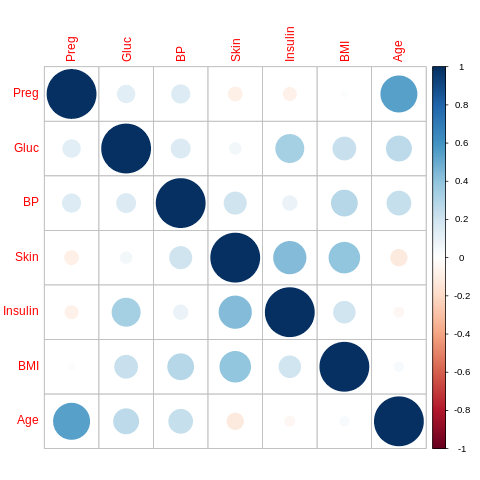

In [ ]:
%%R
corrplot::corrplot(cor_data)

### Box/Violine plots

We can create a nice looking plots with results of ANOVA and post-hoc tests on the same plot (directly on the boxplots). We will use gbetweenstats() function of ggstatsplot package:

In [ ]:
%%R
p1<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = Preg,
  ylab = "Number of times pregnant",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Number of times pregnant") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p2<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = Gluc,
  ylab = "Glucose concentration",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("	Plasma glucose concentration") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p3<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = BMI,
  ylab = "Body mass index",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Body mass index") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))


p4<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = BP,
  ylab = "Blood Pressure (mm Hg)",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Diastolic Blood Pressure (mm Hg)") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

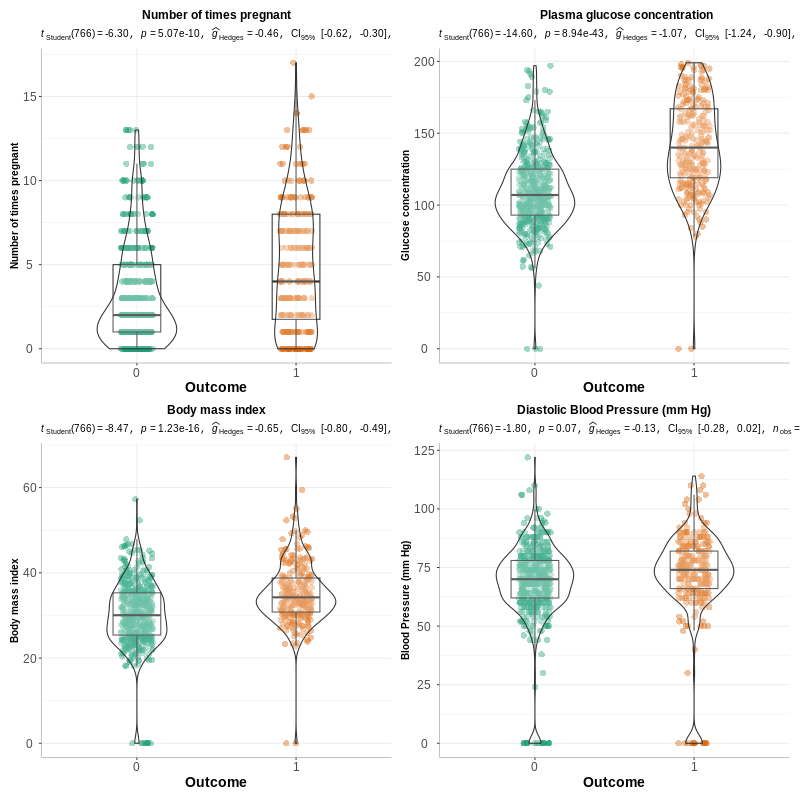

In [ ]:
%%R -w 800 -h 800 -u px
(p1|p2)/(p3|p4)

### Split Data

In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(mf,.(Outcome),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(mf, .(Outcome),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

print(prop.table(table(train$Outecome)))
print(prop.table(table(test$Outcome)))

numeric(0)

        0         1 
0.6493506 0.3506494 


## Fit a Probit Model

If you want to run a **probit** regression in R, it's just like running a logistic regression. But instead of log-odds, your outcomes will be in z-score units. However, z-score units are not easy to understand and may not be useful for the readers. In probit regression, you cannot use an odds ratio because we are not working with odds or log-odds outcomes anymore. Instead, we rely on probability to interpret the results. If you want to understand how R calculates probability from z-score units, you need to know your z-score tables and normal distribution functions. Calculating probability from a normal distribution is complicated, so we use approximation, which is what z-tables are for. In practice, we use the `ggpredict()` and `margins()` functions to predict probabilities and marginal effects, respectively, from our coefficients.

We will use **Probit regression** to predict customer feed back based on various attributes related to occupation, family Size, location etc. We will use `glm()` function with `family = binomial(link = "probit"))` for probit regression.

In [ ]:
%%R
fit.probit<-glm(Outcome~., data= train,
             family = binomial(link = "probit"))

In [ ]:
%%R
summary(fit.probit)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "probit"), 
    data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.9275039  0.4720802 -10.438  < 2e-16 ***
Preg         0.0622470  0.0234914   2.650  0.00805 ** 
Gluc         0.0222748  0.0026113   8.530  < 2e-16 ***
BP          -0.0105857  0.0039040  -2.712  0.00670 ** 
Skin        -0.0032830  0.0048758  -0.673  0.50075    
Insulin     -0.0001881  0.0006710  -0.280  0.77928    
BMI          0.0516561  0.0101127   5.108 3.25e-07 ***
DPF          0.5411938  0.2110067   2.565  0.01032 *  
Age          0.0128172  0.0072005   1.780  0.07507 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 694.17  on 536  degrees of freedom
Residual deviance: 491.29  on 528  degrees of freedom
AIC: 509.29

Number of Fisher Scoring iterations: 5



We can see that the `Preg` coefficient is 0.062. Here we can infer that for each unit increase in Preg, the predicted probability of having dibetes increases by a factor of exp(0.062) = 1.06, or about 6%. This effect is statistically significant with a p-value of 0.00805.

In [ ]:
%%R
1-4.9

[1] -3.9


`summ` function of **jtools** produce summary table of regression models:

In [ ]:
%%R
jtools::summ(fit.probit)

MODEL INFO:
Observations: 537
Dependent Variable: Outcome
Type: Generalized linear model
  Family: binomial 
  Link function: probit 

MODEL FIT:
χ²(8) = 202.89, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.43
Pseudo-R² (McFadden) = 0.29
AIC = 509.29, BIC = 547.86 

Standard errors:MLE
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)         -4.93   0.47   -10.44   0.00
Preg                 0.06   0.02     2.65   0.01
Gluc                 0.02   0.00     8.53   0.00
BP                  -0.01   0.00    -2.71   0.01
Skin                -0.00   0.00    -0.67   0.50
Insulin             -0.00   0.00    -0.28   0.78
BMI                  0.05   0.01     5.11   0.00
DPF                  0.54   0.21     2.56   0.01
Age                  0.01   0.01     1.78   0.08
------------------------------------------------


### Interpretation of Probit Model

We can use `reoprt()` function of **report** package to further explain the `fit.probit` object.

In [ ]:
%%R
report::report(fit.probit)

We fitted a probit model (estimated using ML) to predict Outcome with Preg,
Gluc, BP, Skin, Insulin, BMI, DPF and Age (formula: Outcome ~ Preg + Gluc + BP
+ Skin + Insulin + BMI + DPF + Age). The model's explanatory power is
substantial (Nagelkerke's R2 = 0.43). The model's intercept, corresponding to
Preg = 0, Gluc = 0, BP = 0, Skin = 0, Insulin = 0, BMI = 0, DPF = 0 and Age =
0, is at -4.93 (95% CI [-5.86, -4.04], p < .001). Within this model:

  - The effect of Preg is statistically significant and positive (beta = 0.06,
95% CI [0.02, 0.11], p = 0.008; Std. beta = 0.21, 95% CI [0.06, 0.36])
  - The effect of Gluc is statistically significant and positive (beta = 0.02,
95% CI [0.02, 0.03], p < .001; Std. beta = 0.70, 95% CI [0.55, 0.86])
  - The effect of BP is statistically significant and negative (beta = -0.01, 95%
CI [-0.02, -3.07e-03], p = 0.007; Std. beta = -0.20, 95% CI [-0.34, -0.06])
  - The effect of Skin is statistically non-significant and negative (beta =
-3.28e-03, 95% 

### Model Performance

In [ ]:
%%R
performance::performance(fit.probit)

# Indices of model performance

AIC     |    AICc |     BIC | Nagelkerke's R2 |  RMSE | Sigma | Log_loss | Score_log | Score_spherical |   PCP
--------------------------------------------------------------------------------------------------------------
509.288 | 509.629 | 547.862 |           0.434 | 0.384 | 1.000 |    0.457 |      -Inf |           0.006 | 0.702


### Visualization of model assumptions

The package **performance** provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`

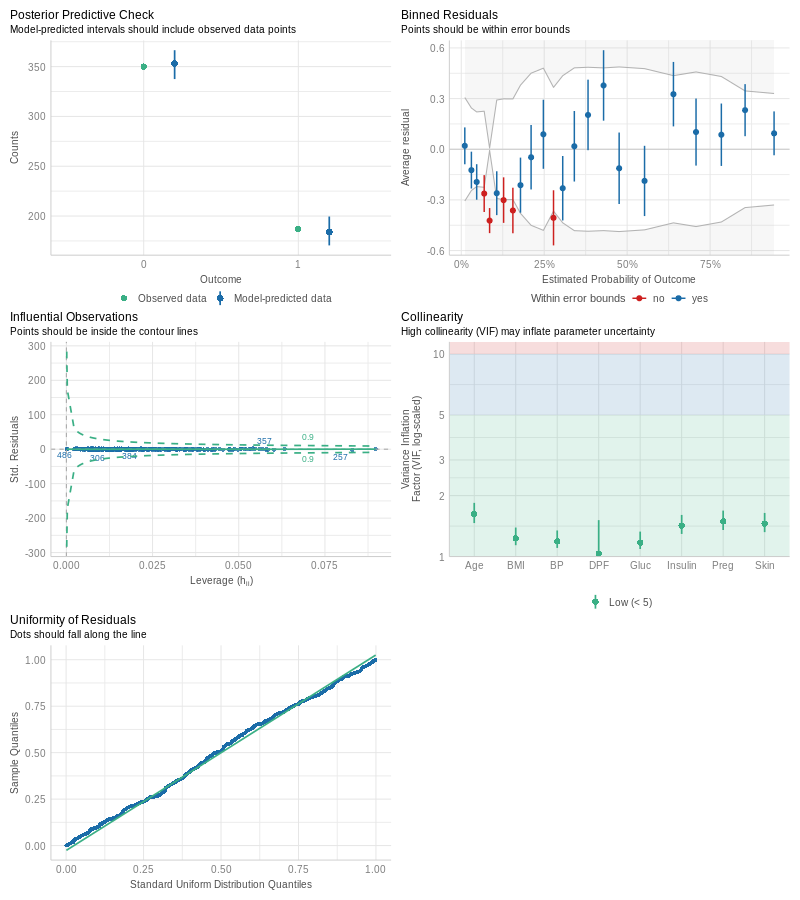

In [ ]:
%%R -w 800 -h 900 -u px
performance::check_model(fit.probit)

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.


In [ ]:
%%R
margins::margins(fit.probit, variables = "Preg")

    Preg
 0.01609


we get the same marginal effect using `avg_slopes()` function from the **marginaleffects** package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.probit, variables = "Preg")


 Estimate Std. Error   z Pr(>|z|)   S  2.5 % 97.5 %
   0.0161    0.00596 2.7  0.00698 7.2 0.0044 0.0278

Term: Preg
Type:  response 
Comparison: mean(dY/dX)
Columns: term, contrast, estimate, std.error, statistic, p.value, s.value, conf.low, conf.high, predicted_lo, predicted_hi, predicted 



To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.


In [ ]:
%%R
effect<-ggeffects::predict_response(fit.probit, "Preg", margin = "empirical")
effect

# Average predicted probabilities of Outcome

Preg | Predicted |     95% CI
-----------------------------
   0 |      0.22 | 0.16, 0.29
   2 |      0.26 | 0.21, 0.31
   4 |      0.30 | 0.26, 0.35
   6 |      0.35 | 0.29, 0.41
   7 |      0.37 | 0.30, 0.44
   9 |      0.42 | 0.32, 0.52
  11 |      0.47 | 0.33, 0.60
  17 |      0.61 | 0.37, 0.82



Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



The relative marginal effects:

In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 0.01891575


**ggeffects** supports labelled data and the `plot()`- method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

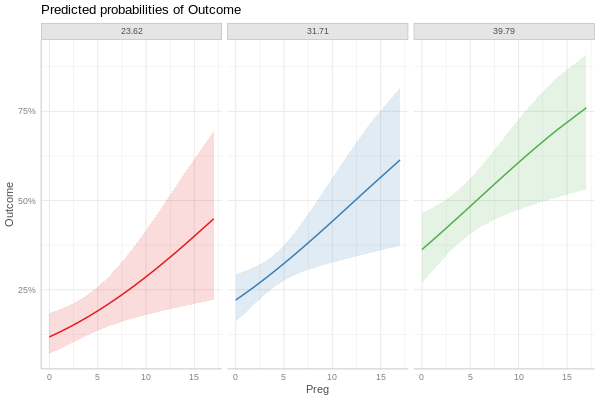

In [ ]:
%%R -w 600 -h 400 -u px
preg.bmi <- predict_response(fit.probit, terms = c("Preg", "BMI"))
plot(preg.bmi, facets = TRUE)

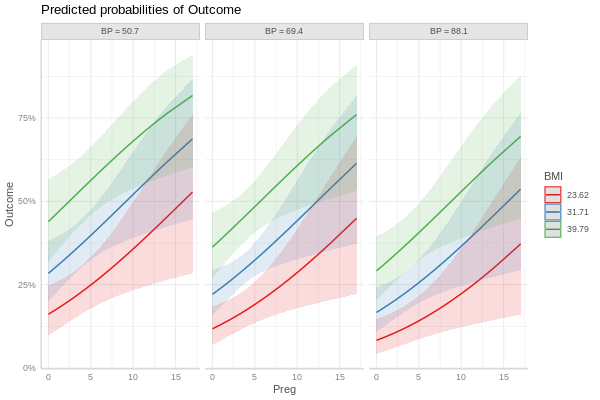

In [ ]:
%%R -w 600 -h 400 -u px
preg.bmi.bp <- predict_response(fit.probit, terms = c("Preg", "BMI", "BP"))
plot(preg.bmi.bp, facets = TRUE)

`geom_smooth()` using formula = 'y ~ x'


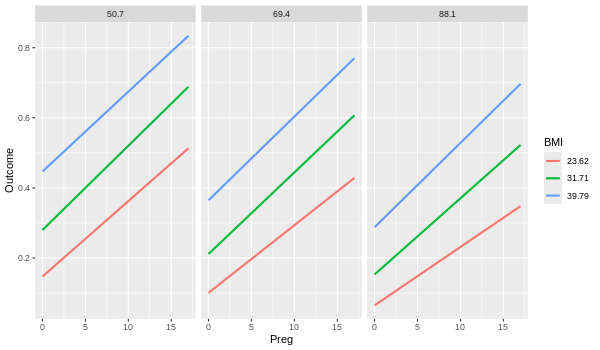

In [ ]:
%%R -w 600 -h 350 -u px
# select specific levels for grouping terms
ggplot(preg.bmi.bp, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = get_y_title(preg.bmi.bp),
    x = get_x_title(preg.bmi.bp),
    colour = get_legend_title(preg.bmi.bp)
  )

### Relationship between z-score outcome and continuous covariates

To evaluate the validity the assumption linear relationship between z-score outcome and continuous covariates, we can employ the **probit()** function to predict the outcome in z-score units. We can then save these predictions to our dataset and create a scatter plot that displays the predicted log odds vs the independent variables. To generate the scatter plot, we should create a new dataset that only contains observations from the model and numeric covariates, excluding missing values.

By plotting the predicted log odds against each independent variable, we can visually examine the relationship between the independent variables and the predicted outcome. The lowess line, which is a smoothing line that estimates the underlying trend in the data, can help us identify any non-linear relationships or patterns in the data.

This approach can help us determine if there are any significant relationships between the independent variables and the predicted outcome, and can help us identify any potential issues with our model assumptions or data.

`geom_smooth()` using formula = 'y ~ x'


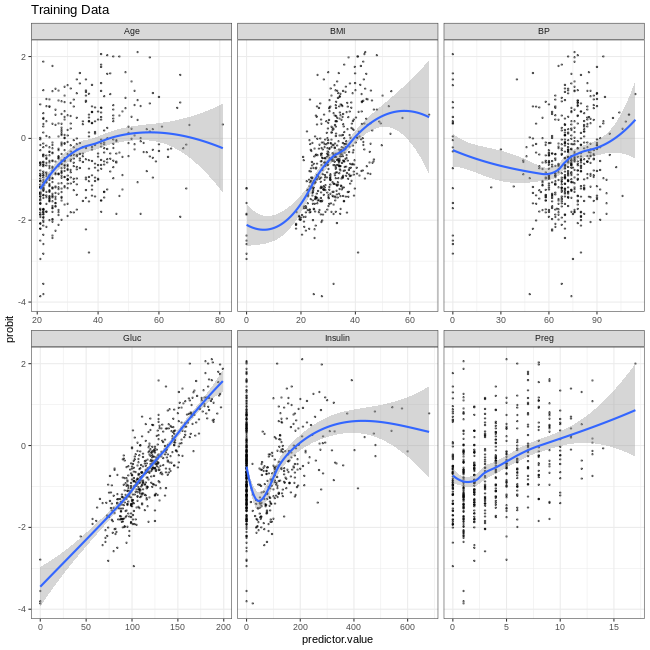

In [ ]:
%%R -w 650 -h 650 -u px
train.covariates <- train %>%
  select(Preg, Gluc, Insulin, BP, BMI, Age)
# save names of predictors to plug into command below.
  train.predictors <- colnames(train.covariates)

# Save predicted probabilities
  train.covariates$Prob <- fit.probit$fitted.values

# Manually calculate the probit values and tidy data for the plot
train.covariates<- train.covariates %>%
    mutate(probit = qnorm(Prob)) %>%
    select(-Prob) %>%
    gather(key = "predictors", value = "predictor.value", -probit)

# Then you can plot logit values over each of the numeric variables.
  ggplot(train.covariates, aes(y = probit, x = predictor.value))+
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "loess") +
    theme_bw() +
    facet_wrap(~predictors, scales = "free_x") +
    ggtitle("Training Data")

### Prediction and Model Evaluation

In [ ]:
%%R
ggpredict(fit.probit, terms = "Preg[2:8, by = 1]")

# Predicted probabilities of Outcome

Preg | Predicted |     95% CI
-----------------------------
   2 |      0.26 | 0.21, 0.31
   3 |      0.28 | 0.24, 0.33
   4 |      0.30 | 0.26, 0.35
   5 |      0.32 | 0.28, 0.37
   6 |      0.35 | 0.29, 0.41
   7 |      0.37 | 0.30, 0.44
   8 |      0.39 | 0.31, 0.48

Adjusted for:
*    Gluc = 119.74
*      BP =  69.42
*    Skin =  20.23
* Insulin =  76.21
*     BMI =  31.71
*     DPF =   0.46
*     Age =  32.67


The `predict()` function for logistic models returns the default predictions of log-odds, which are probabilities on the logit scale. When type = `response`, the function provides the predicted probabilities.

In [ ]:
%%R
test$probs <- predict(fit.probit, test, returnData = TRUE,  type = "response")

In [ ]:
%%R
test$class <- ifelse(test$probs  > 0.5,"1","0")

`geom_smooth()` using formula = 'y ~ x'


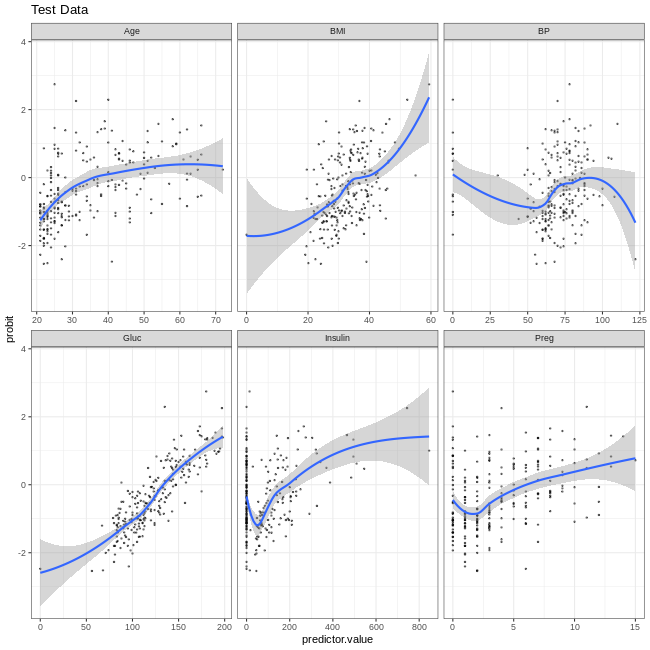

In [ ]:
%%R -w 650 -h 650 -u px
test.covariates <- test %>%
  select(Preg, Gluc, Insulin, BP, BMI, Age)
# save names of predictors to plug into command below.
  test.predictors <- colnames(test.covariates)

# Save predicted probabilities
  test.covariates$Prob <- predict(fit.probit, test, returnData = TRUE,  type = "response")

# Manually calculate the probit values and tidy data for the plot
test.covariates<- test.covariates %>%
    mutate(probit = qnorm(Prob)) %>%
    select(-Prob) %>%
    gather(key = "predictors", value = "predictor.value", -probit)

# Then you can plot logit values over each of the numeric variables.
  ggplot(test.covariates, aes(y = probit, x = predictor.value))+
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "loess") +
    theme_bw() +
    facet_wrap(~predictors, scales = "free_x")+
    ggtitle ("Test Data")

## Summary and Conclusion

Probit regression is particularly useful when you have binary response variables and want to understand the relationship between predictors and the probability of occurrence of the outcome.

In this tutorial, we delved into the process of performing probit regression in R. We discovered that probit regression is a useful technique for modeling binary outcomes by assuming a cumulative normal distribution function to represent the relationship between the predictors and the response variable. By fitting a probit regression model in R, we can estimate the parameters of the model and make predictions on new data.

Probit regression offers several benefits, including its versatility in handling binary outcomes and its ability to provide interpretable coefficients. However, it's vital to interpret the results carefully, considering the model's assumptions and limitations.

By mastering probit regression in R, you can gain insights into the factors influencing binary outcomes and make informed decisions in various fields, including economics, social sciences, and epidemiology. Whether you're exploring the effects of predictors on disease occurrence or analyzing consumer behavior, probit regression in R equips you with the tools to tackle complex binary response variable scenarios.

## References

1.  [Categorical Regression in Stata and R](https://bookdown.org/sarahwerth2024/CategoricalBook/probit-regression-r.html#running-a-probit-regression-in-r)

2.  [PROBIT REGRESSION \| R DATA ANALYSIS EXAMPLES](https://stats.oarc.ucla.edu/r/dae/probit-regression/)

3.  [Probit Regression in R, Python, Stata, and SAS](https://jbhender.github.io/Stats506/F18/GP/Group14.html)